In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
x = np.arange(20).reshape(-1, 1)
y = np.array([5, 12, 11, 19, 30, 29, 23, 40, 51, 54, 74, 62, 68, 73, 89, 84, 89, 101, 99, 106])

In [3]:
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [4]:
y

array([  5,  12,  11,  19,  30,  29,  23,  40,  51,  54,  74,  62,  68,
        73,  89,  84,  89, 101,  99, 106])

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=8, random_state=0)

In [6]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [7]:
model.intercept_

3.1617195496417523

In [8]:
model.coef_

array([5.53121801])

In [9]:
model_prediction = model.predict(xtest)
model_prediction

array([102.72364381,   8.69293756, 108.25486182,  47.41146366,
        58.47389969,  97.19242579,  36.34902764,  75.06755374])

In [10]:
model.score(xtrain, ytrain) * 100

98.68175024574795

In [11]:
model.score(xtest, ytest) * 100

94.65896927715023

In [12]:
x = pd.DataFrame(x, columns=['X'])
y = pd.DataFrame(y, columns=['Y'])

In [13]:
frames = [x, y]
df = pd.concat(frames, axis=1)

In [14]:
df.head()

,X,Y
0,0,5
1,1,12
2,2,11
3,3,19
4,4,30


In [15]:
model_prediction = model.predict(x.values)

In [16]:
df['y_pred'] = model_prediction

In [17]:
df

,X,Y,y_pred
0,0,5,3.161720
1,1,12,8.692938
2,2,11,14.224156
3,3,19,19.755374
4,4,30,25.286592
5,5,29,30.817810
6,6,23,36.349028
7,7,40,41.880246
8,8,51,47.411464
9,9,54,52.942682


In [18]:
MAE = mean_absolute_error(df.Y, df.y_pred)
MAE

3.9822415557830126

In [19]:
RMSE = np.sqrt(MAE)
RMSE

1.9955554504405566

In [20]:
# y = mx + c
m = model.coef_
c = model.intercept_

In [21]:
y = m * 19 + c
y

array([108.25486182])

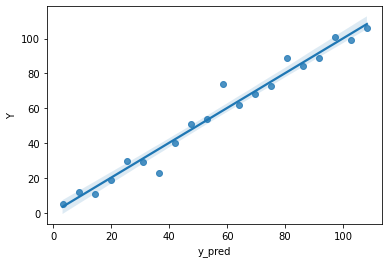

In [22]:
sns.regplot(x='y_pred' ,y='Y' ,data=df)
plt.show()